In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("Data7Pranav.xlsx")


In [3]:
X = data[['Airtemp', 'Rel.Hum', 'Rain', 'W.Speed', 'leaf wetness hr.']]

In [4]:
X.head()

,Airtemp,Rel.Hum,Rain,W.Speed,leaf wetness hr.
0,25.7,76.0,0.0,0.0,0.42
1,24.1,83.0,0.2,0.1,14.33
2,24.5,83.0,0.6,0.1,11.33
3,23.4,85.0,1.2,0.1,11.42
4,25.0,78.0,0.0,0.1,8.50


In [5]:
from sklearn.cluster import KMeans

In [6]:
num_clusters = 3

In [7]:
kmeans = KMeans(n_clusters=num_clusters)

In [8]:
kmeans.fit(X)

C:\Users\Pranav\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [9]:
cluster_labels = kmeans.labels_

In [10]:
print(cluster_labels)

[2 1 1 ... 0 0 0]


C:\Users\Pranav\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


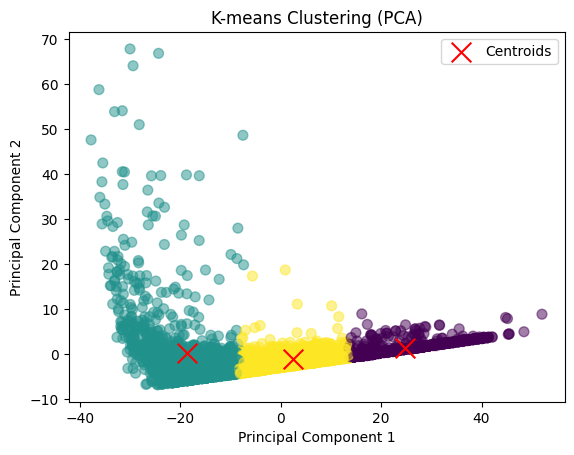

In [12]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Fit KMeans on reduced data
kmeans.fit(X_pca)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Scatter plot of the data points with cluster centroids
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering (PCA)')
plt.legend()
plt.show()


C:\Users\Pranav\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


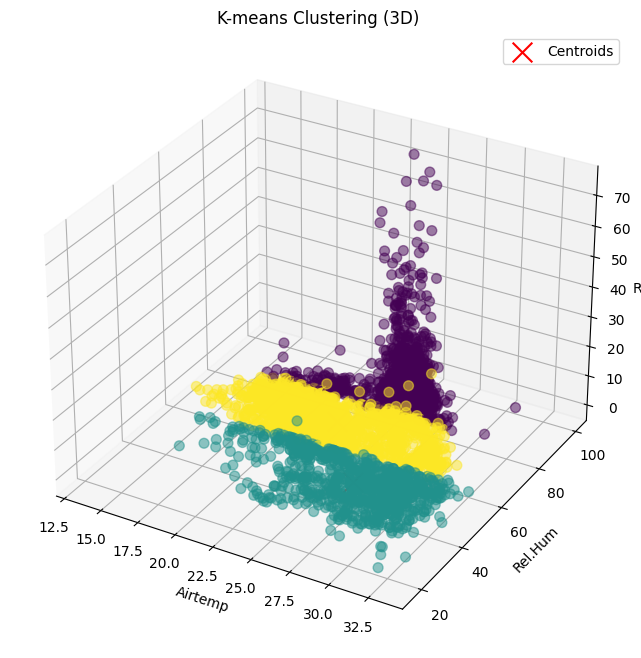

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Fit KMeans on original data
kmeans.fit(X)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the data points with cluster centroids
ax.scatter(X['Airtemp'], X['Rel.Hum'], X['Rain'], c=cluster_labels, cmap='viridis', s=50, alpha=0.5)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='red', marker='x', s=200, label='Centroids')
ax.set_xlabel('Airtemp')
ax.set_ylabel('Rel.Hum')
ax.set_zlabel('Rain')
ax.set_title('K-means Clustering (3D)')
plt.legend()
plt.show()
